# Language modelling and Text classification

### We try to analayze some textual data from the corpus and then classify the telugu texts based on their topic

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
os.environ['GIT_PYTHON_GIT_EXECUTABLE'] = 'C:/Users/sathishreddy/Desktop/Vishnu Reddy/Amrita Vishwa Vidyapeetham/Programming Languages/Git/Git/bin'
import os
os.environ['GIT_PYTHON_REFRESH'] = 'quiet'

In [2]:


telugu_news_df = pd.read_csv("telugu_dataset/telugu_news/train_telugu_news.csv")
telugu_news_df

,SNo,date,heading,body,topic
0,414,11-05-2017 00:39:13,ఐడిబిఐపై ఆర్‌బిఐ నజర్‌,భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ ...,business
1,2668,12-06-2017 00:40:32,బ్యాంకింగ్‌ చీఫ్‌లతో నేడు జైట్లీ భేటీ,న్యూఢిల్లీ : ఆర్థిక మంత్రి అరుణ్‌ జైట్లీ సోమవా...,business
2,19923,19-01-2017 19:51:31,కీలక వికెట్ తీసిన జడేజా..,కటక్: ఇంగ్లండ్‌తో జరుగుతున్న సెకండ్ వన్డే మ్యా...,sports
3,15762,23-11-2017 17:29:04,మరో రెచ్చగొట్టే చర్యకు దిగిన పాకిస్థాన్,\nఇస్లామాబాద్ : పాకిస్థాన్ అంతర్జాతీయ ఉగ్రవాది...,nation
4,8624,03-04-2017 15:48:23,గోవాలో కొడుకుతో కలిసి అల్లు అర్జున్ స్విమ్మింగ్!,స్టార్‌ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటి...,entertainment
...,...,...,...,...,...
17307,10296,02-02-2017 12:18:11,"చిరు,ఎన్టీఆర్ వల్ల కాజల్‌కు దక్కిందేమిటి..?",ఇండస్ట్రీలో హీరోయిన్‌గా రాణించాలంటే కేవలం గ్లా...,entertainment
17308,13641,20-12-2017 04:16:32,"హిమాచల్‌ సీఎం రేసులో నడ్డా, జైరామ్‌","షిమ్లా, డిసెంబరు 19: హిమాచల్‌ ప్రదేశ్‌ అసెంబ్ల...",nation
17309,17288,20-05-2017 03:00:10,సతతహరిత విప్లవం అవసరం,2022 నాటికి రైతుల ఆదాయం రెట్టింపు చేయడానికి క...,nation
17310,20882,13-06-2017 04:30:36,ఇంగ్లండ్‌ జెర్సీలో వార్న్‌..!,పందెంలో ఓడిన షేనలండన్: ఆస్ట్రేలియా స్పిన్ లెజె...,sports


# Text pre-processing

In [3]:
telugu_news_df.isna().sum()

SNo        0
date       0
heading    1
body       0
topic      0
dtype: int64

In [4]:
telugu_news_df[telugu_news_df["heading"].isna() == True]

,SNo,date,heading,body,topic
8073,14673,20-02-2017 15:23:53,NaN,ఈ కిరాతకుడు 200 మందిని అత్యాచారం చేసి.. 500 మం...,nation


In [5]:
del telugu_news_df["heading"]
del telugu_news_df["SNo"]

In [6]:
telugu_news_df["topic"].unique()

array(['business', 'sports', 'nation', 'entertainment', 'editorial'],
      dtype=object)

In [7]:
topic_dic = {}

c = 0
for un in telugu_news_df["topic"].unique():
    if un not in topic_dic:
        topic_dic[un] = c
        c += 1
        
topic_dic

{'business': 0, 'sports': 1, 'nation': 2, 'entertainment': 3, 'editorial': 4}

In [8]:
inv_topic_dict = {v: k for k, v in topic_dic.items()}

In [9]:
def func_topic(s):
    return topic_dic[s]

telugu_news_df["topic"] = telugu_news_df["topic"].apply(func_topic)

C:\Users\sathishreddy\AppData\Local\Temp\ipykernel_4476\2116933034.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


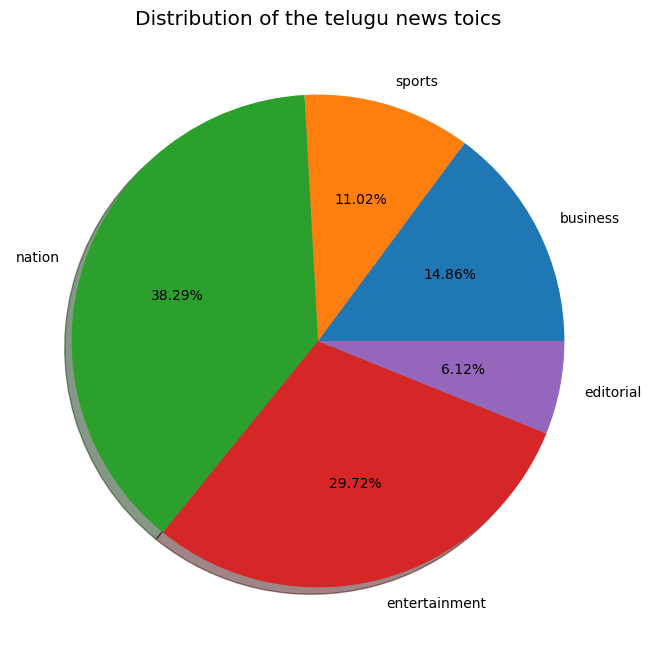

In [10]:
def get_count(df):
    
    unvals = list(df.unique())
    op = [0]*len(unvals)
    
    i = 0
    for un in unvals:
        op[i] = df[df == un].shape[0]
        i += 1
        
    return [list(unvals),op]

cont = get_count(telugu_news_df["topic"])
clables = cont[0]

labels = []
for c in clables:
    labels.append(inv_topic_dict[c])

plt.figure(figsize=(10,8))
plt.title("Distribution of the telugu news toics", fontsize = 14.5)
plt.style.use('seaborn-colorblind')
plt.pie(np.array(cont[1]), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [11]:
date_df = telugu_news_df["date"]
del telugu_news_df["date"]

Installing the dependancies and the indic libraries for telugu text processing

In [12]:
pip install indic-nlp-library

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!pip install GitPython
#!pip install git 2.40.1

In [19]:
#pip install GitPython


In [13]:
import git

In [14]:
from git import Repo

# Clone a repository
repo_url = 'https://github.com/anoopkunchukuttan/indic_nlp_resources.git'
#!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

In [15]:
# Clone a repository
repo_url = 'https://github.com/anoopkunchukuttan/indic_nlp_library.git'

#!git clone https://github.com/anoopkunchukuttan/indic_nlp_library.git

In [16]:
import sys
from indicnlp import common

# The path to the local git repo for Indic NLP library
INDIC_NLP_LIB_HOME=r"indic_nlp_library"

# The path to the local git repo for Indic NLP Resources
INDIC_NLP_RESOURCES=r"indic_nlp_resources"

# Add library to Python path
sys.path.append(r'{}\src'.format(INDIC_NLP_LIB_HOME))

# Set environment variable for resources folder
common.set_resources_path(INDIC_NLP_RESOURCES)

In [17]:
from indicnlp.tokenize import sentence_tokenize

indic_string = telugu_news_df["body"][0]
# Split the sentence, language code "hi" is passed for hingi
sentences=sentence_tokenize.sentence_split(indic_string, lang='te')

# print the sentences
for t in sentences:
    print(t)

భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ వ్యవహారాలపై భారత రిజర్వు బ్యాంకు (ఆర్‌బిఐ) ఒక కన్నేసింది.
ఐడిబిఐ బ్యాంకును ఆర్‌బిఐ వాచ్‌లి్‌స్టలో చేర్చినట్టుగా తెలిసింది.
నికర మొండిపద్దుల మొత్తం 6 శాతం దాటడం, వరసగా రెండేళ్ల పాటు నష్టాలను  ప్రకటించడం, కాపిటల్‌ అడెక్వసీ నిర్దేశిత ప్రమాణాల కంటే తగ్గడం. . . ఈ సందర్భాల్లో బ్యాంకులను ఆర్‌బిఐ వాచ్‌ లిస్ట్‌లో చేరుస్తుంది.
తమ బ్యాంకుకు సంబంధించి ఆర్‌బిఐ ప్రాంప్ట్‌ కరెక్టీవ్‌ యాక్షన్‌ (పిసిఎ) చేపట్టినట్టు ఐడిబిఐ వెల్లడించింది.
గతంలో ఓవర్సీస్‌ బ్యాంక్‌, యునైటెడ్‌ బ్యాంక్‌కు సంబంధించి  కూడా ఆర్‌బిఐ పిసిఎ చేపట్టింది.
పిసిఎ వల్ల బ్యాంకుపై ఆర్థికంగా భారం పడదనీ, దీనివల్ల అంతర్గత నియంత్రణలు మెరుగుపడటంతో పాటు, కార్యకలాపాలు మెరుగవుతాయని ఐడిబిఐ వివరించింది.
ఆర్‌బిఐ ఆదేశాలకు అనుగుణంగా ఇప్పుడు మూలధనాన్ని పొదుపుగా వినియోగించడంపై  ఐడిబిఐ దృష్టి సారించాల్సి ఉంటుంది.
ఇందులో భాగంగా పరపతిపై నియంత్రణలు విధించడం, నియామకాలను నిలిపేయడం, కొత్త పెట్టుబడి పథకాలను పక్కన బెట్టడంవంటి చర్యలు తీసుకోవాల్సి ఉంటుం ది.
బ్యాంకు సరైన రీతిలో స్పందించని పక్షంలో మరో బలమైన బ్యాంకులో  వి

In [18]:
telugu_news_df["body_processed"] = telugu_news_df["body"].str.replace('\u200c', '')
telugu_news_df["body_processed"] = telugu_news_df["body_processed"].str.replace('\n', '')
telugu_news_df["body_processed"] = telugu_news_df["body_processed"].str.replace('\t', '')
telugu_news_df["body_processed"] = telugu_news_df["body_processed"].str.replace('\xa0', '')

In [19]:
PUNCT = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT))

In [20]:
telugu_news_df["body_processed"][6665]

' టెలికాం షేర్లలో అమ్మకాల ఒత్తిడి'

In [21]:
from indicnlp.tokenize import sentence_tokenize


tot_telugu_text1 = ""

for t in telugu_news_df["body_processed"]:
  tot_telugu_text1 += t

# tot_sentances_telugu = []

tot_sentences = sentence_tokenize.sentence_split(tot_telugu_text1, lang='te')
print(len(tot_sentences))

273291


In [22]:
telugu_news_df["body_processed"] = telugu_news_df["body_processed"].apply(lambda text: remove_punctuation(text))

In [23]:
# telugu_news_df["body_processed"][0]
del telugu_news_df["body"]

In [24]:
tot_telugu_text = ""

c = 1
for t in telugu_news_df["body_processed"]:
  tot_telugu_text += t
  c += 1

print(c)

17313


In [25]:
len(tot_telugu_text)

23917934

## Tokenizing and building a vocabulary for the text

In [26]:
from indicnlp.tokenize import indic_tokenize  

vocab_dic  = {}
tokenized_text = []
heap_arr = []

for t in indic_tokenize.trivial_tokenize(tot_telugu_text):
    tokenized_text.append(t)
    heap_arr.append(len(vocab_dic))

    if t not in vocab_dic:
      vocab_dic[t] = 1

    else:
      vocab_dic[t] += 1

In [27]:
len(vocab_dic), len(tokenized_text)

(328911, 2932015)

In [28]:
len(heap_arr)

2932015

In [29]:
from nltk.probability import FreqDist 

freq_dist = FreqDist(vocab_dic)

**Heaps Law**

In linguistics, Heaps' law (also called Herdan's law) is an empirical law which describes the number of distinct words in a document (or set of documents) as a function of the document length (so called type-token relation). It can be formulated as

-> V_R(n) = K*(n^β) 

where V_R is the number of distinct words in an instance text of size n. K and β are free parameters determined empirically. With English text corpora, typically K is between 10 and 100, and β is between 0.4 and 0.6. 

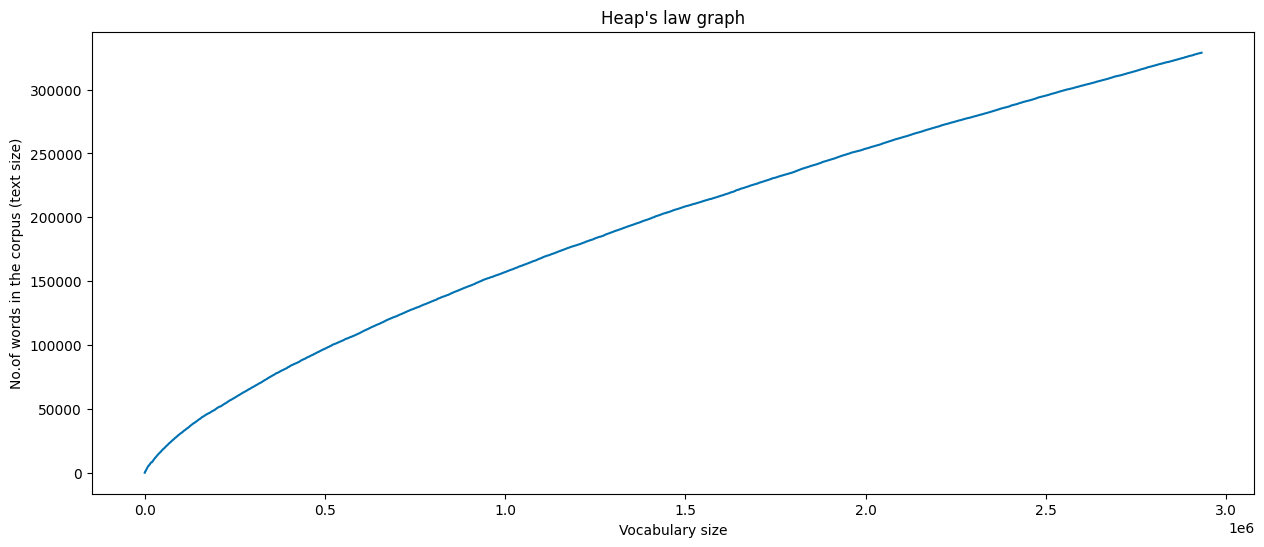

In [30]:
plt.figure(figsize = (15,6))
plt.plot(heap_arr)
plt.title("Heap's law graph")
plt.xlabel("Vocabulary size")
plt.ylabel("No.of words in the corpus (text size)")
plt.show()

In [31]:
vocab_dic_sorted = {k: v for k, v in sorted(vocab_dic.items(), key=lambda item: item[1], reverse = True)}

In [32]:
top_k_words = []

k = 50
c = 0

for key in vocab_dic_sorted.keys():

  if c == k:
    break

  top_k_words.append([key, vocab_dic_sorted[key]])
  c += 1

In [33]:
top_k_words_df = pd.DataFrame(top_k_words)
top_k_words_df.columns = ["word", "freq"]
top_k_words_df.head()

,word,freq
0,ఈ,38682
1,కూడా,16856
2,ఆ,15523
3,నుంచి,12650
4,ఆయన,9968


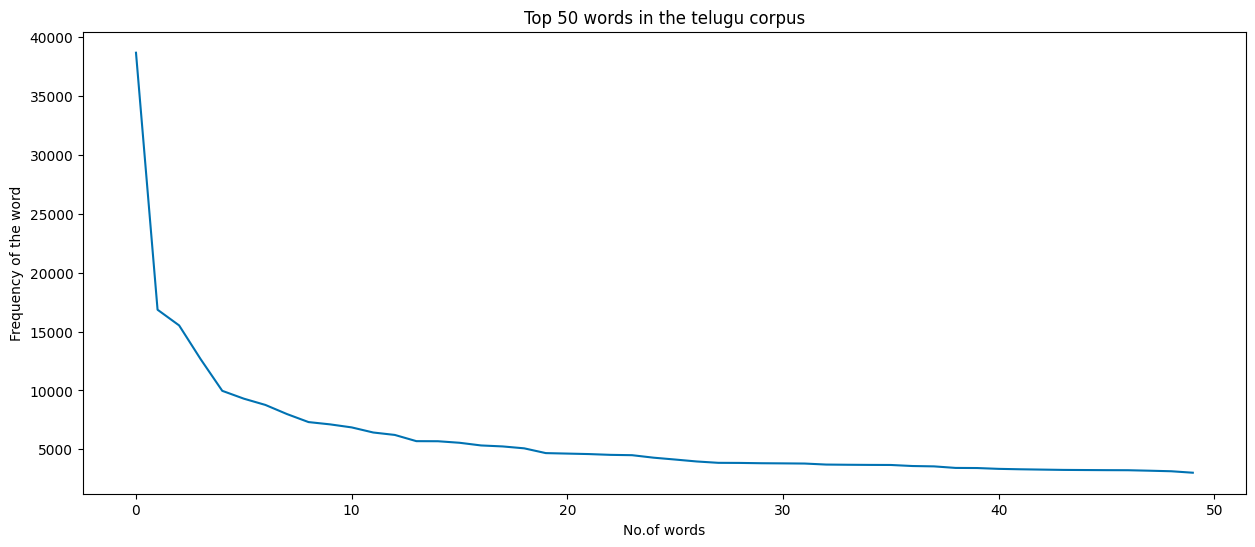

In [34]:
plt.figure(figsize = (15,6))
plt.plot(top_k_words_df["freq"])
plt.title("Top 50 words in the telugu corpus")
plt.xlabel("No.of words")
plt.ylabel("Frequency of the word")
# plt.xlim([0,k])
plt.show()

In [35]:
telugu_words = list(vocab_dic_sorted.keys())

In [36]:
tot_sentences_proc = []

for sen in tot_sentences:
  tot_sentences_proc.append(remove_punctuation(sen))

In [37]:
tot_sentences_proc[0]

'భారీ ఎత్తున మొండిబకాయిలు పెరిగిపోవడంతో ఐడిబిఐ వ్యవహారాలపై భారత రిజర్వు బ్యాంకు ఆర్బిఐ ఒక కన్నేసింది'

# N-Gram analysis of the entire corpus

In [38]:
from nltk.util import ngrams

bigrams_telugu_vocab = {}

for sen in tot_sentences_proc:

  tokens = indic_tokenize.trivial_tokenize(sen)

  bigram = list(ngrams(tokens, 2)) 

  for big in bigram:
    if tuple(big) not in bigrams_telugu_vocab:
      bigrams_telugu_vocab[tuple(big)] = 1

    else:
      bigrams_telugu_vocab[tuple(big)] += 1

In [39]:
bigrams_telugu_vocab = {k: v for k, v in sorted(bigrams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}

In [40]:
print("Total no.of unique bi-grams :- ", len(bigrams_telugu_vocab))

Total no.of unique bi-grams :-  1609783


In [41]:
k = 30
print("Top" ,k ,"most-occuring bi-grams in the corpus are\n")
c = 0
for key in bigrams_telugu_vocab:
  if c == k:
    break
  print(key , " -> ", bigrams_telugu_vocab[key])
  c += 1

Top 30 most-occuring bi-grams in the corpus are

('ఈ', 'సినిమా')  ->  2016
('ఆ', 'తర్వాత')  ->  1275
('ఈ', 'ఏడాది')  ->  995
('కోట్ల', 'రూపాయల')  ->  976
('ఈ', 'సందర్భంగా')  ->  963
('సంగతి', 'తెలిసిందే')  ->  898
('అయితే', 'ఈ')  ->  824
('విషయం', 'తెలిసిందే')  ->  808
('ఈ', 'నేపథ్యంలో')  ->  800
('ఈ', 'సినిమాలో')  ->  794
('ఈ', 'నెల')  ->  788
('నోట్ల', 'రద్దు')  ->  767
('వ్యక్తం', 'చేశారు')  ->  720
('గత', 'ఏడాది')  ->  670
('నరేంద్ర', 'మోదీ')  ->  659
('ప్రధాని', 'మోదీ')  ->  640
('సోషల్', 'మీడియాలో')  ->  630
('ఈ', 'చిత్రం')  ->  629
('ఆయన', 'చెప్పారు')  ->  556
('పెద్ద', 'నోట్ల')  ->  542
('కేంద్ర', 'ప్రభుత్వం')  ->  534
('ఆ', 'సినిమా')  ->  531
('అవకాశం', 'ఉంది')  ->  518
('ఈ', 'మేరకు')  ->  502
('స్పష్టం', 'చేశారు')  ->  490
('ఇప్పటి', 'వరకు')  ->  466
('ఈ', 'విషయాన్ని')  ->  461
('ఆ', 'పార్టీ')  ->  451
('చాలా', 'మంది')  ->  450
('కోట్ల', 'రూపాయలు')  ->  441


In [42]:
trigrams_telugu_vocab = {}

for sen in tot_sentences_proc:
  tokens = indic_tokenize.trivial_tokenize(sen)
  trigram = list(ngrams(tokens, 3)) 

  for trig in trigram:
    if tuple(trig) not in trigrams_telugu_vocab:
      trigrams_telugu_vocab[tuple(trig)] = 1

    else:
      trigrams_telugu_vocab[tuple(trig)] += 1

trigrams_telugu_vocab = {k: v for k, v in sorted(trigrams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}

In [43]:
k = 30
print("Top" ,k ,"most-occuring tri-grams in the corpus are\n")
c = 0
for key in trigrams_telugu_vocab:
  if c == k:
    break
  print(key , " -> ", trigrams_telugu_vocab[key])
  c += 1

Top 30 most-occuring tri-grams in the corpus are

('పెద్ద', 'నోట్ల', 'రద్దు')  ->  427
('హైదరాబాద్', 'ఆంధ్రజ్యోతి', 'బిజినెస్')  ->  240
('ప్రధాని', 'నరేంద్ర', 'మోదీ')  ->  219
('కోట్ల', 'రూపాయల', 'నుంచి')  ->  165
('మంత్రి', 'అరుణ్', 'జైట్లీ')  ->  156
('ప్రధాన', 'మంత్రి', 'నరేంద్ర')  ->  152
('ఆర్థిక', 'మంత్రి', 'అరుణ్')  ->  136
('సమయానికి', 'క్లోజ్', 'చేసుకోవాలి')  ->  124
('మంత్రి', 'నరేంద్ర', 'మోదీ')  ->  118
('ఈ', 'సినిమా', 'షూటింగ్')  ->  115
('కాంగ్రెస్', 'ఉపాధ్యక్షుడు', 'రాహుల్')  ->  113
('అమెరికా', 'అధ్యక్షుడు', 'డొనాల్డ్')  ->  108
('అధ్యక్షుడు', 'డొనాల్డ్', 'ట్రంప్')  ->  107
('ఈ', 'సినిమా', 'కోసం')  ->  106
('ఉపాధ్యక్షుడు', 'రాహుల్', 'గాంధీ')  ->  106
('చేసిన', 'సంగతి', 'తెలిసిందే')  ->  105
('కేంద్ర', 'ఆర్థిక', 'మంత్రి')  ->  99
('ఈ', 'సందర్భంగా', 'ఆయన')  ->  98
('భారతీయ', 'జనతా', 'పార్టీ')  ->  96
('ఆగ్రహం', 'వ్యక్తం', 'చేశారు')  ->  94
('ప్రధాన', 'మద్దతు', 'స్థాయి')  ->  93
('నోట్ల', 'రద్దు', 'వల్ల')  ->  89
('ఆవేదన', 'వ్యక్తం', 'చేశారు')  ->  86
('కాంగ్రెస్', 'సీనియర

In [44]:
print("Total no.of unique tri-grams :- ", len(trigrams_telugu_vocab))

Total no.of unique tri-grams :-  1998929


In [45]:
four_grams_telugu_vocab = {}

for sen in tot_sentences_proc:
  tokens = indic_tokenize.trivial_tokenize(sen)
  fourgram = list(ngrams(tokens, 4)) 

  for fourg in fourgram:
    if tuple(fourg) not in four_grams_telugu_vocab:
      four_grams_telugu_vocab[tuple(fourg)] = 1

    else:
      four_grams_telugu_vocab[tuple(fourg)] += 1

four_grams_telugu_vocab = {k: v for k, v in sorted(four_grams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}

In [46]:
k = 30
print("Top" ,k ,"most-occuring 4-grams in the corpus are\n")
c = 0
for key in four_grams_telugu_vocab:
  if c == k:
    break
  print(key , " -> ", four_grams_telugu_vocab[key])
  c += 1

Top 30 most-occuring 4-grams in the corpus are

('ఆర్థిక', 'మంత్రి', 'అరుణ్', 'జైట్లీ')  ->  119
('ప్రధాన', 'మంత్రి', 'నరేంద్ర', 'మోదీ')  ->  117
('కాంగ్రెస్', 'ఉపాధ్యక్షుడు', 'రాహుల్', 'గాంధీ')  ->  89
('అమెరికా', 'అధ్యక్షుడు', 'డొనాల్డ్', 'ట్రంప్')  ->  87
('ట్రేడింగ్కు', 'ప్రారంభ', 'స్థాయి', 'కీలకం')  ->  77
('అంతకన్నా', 'దిగువన', 'మాత్రమే', 'షార్ట్')  ->  77
('దిగువన', 'మాత్రమే', 'షార్ట్', 'పొజిషన్లు')  ->  77
('మాత్రమే', 'షార్ట్', 'పొజిషన్లు', 'శ్రేయస్కరం')  ->  77
('ఇంట్రాడే', 'ట్రేడింగ్కు', 'ప్రారంభ', 'స్థాయి')  ->  75
('ట్రేడింగ్', 'వ్యూహం', 'నిఫ్టీ', 'ఫ్యూచర్స్')  ->  70
('కేంద్ర', 'ఆర్థిక', 'మంత్రి', 'అరుణ్')  ->  69
('వాస్తవిక', 'కదలికల', 'ఆధారంగా', 'నిర్ణయాలు')  ->  66
('కదలికల', 'ఆధారంగా', 'నిర్ణయాలు', 'తీసుకోవాలి')  ->  66
('మార్కెట్', 'వాస్తవిక', 'కదలికల', 'ఆధారంగా')  ->  65
('అంశాల', 'ఆధారంగా', 'ఇచ్చిన', 'సూచన')  ->  63
('ఇది', 'పూర్తిగా', 'ఆస్ర్టోటెక్నికల్', 'అంశాల')  ->  62
('పూర్తిగా', 'ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధారంగా')  ->  62
('ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధా

In [47]:
print("Total no.of unique 4-grams :- ", len(four_grams_telugu_vocab))

Total no.of unique 4-grams :-  1882201


In [48]:
five_grams_telugu_vocab = {}

for sen in tot_sentences_proc:
  tokens = indic_tokenize.trivial_tokenize(sen)
  fivegram = list(ngrams(tokens, 5)) 

  for fiveg in fivegram:
    if tuple(fiveg) not in five_grams_telugu_vocab:
      five_grams_telugu_vocab[tuple(fiveg)] = 1

    else:
      five_grams_telugu_vocab[tuple(fiveg)] += 1

five_grams_telugu_vocab = {k: v for k, v in sorted(five_grams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}

In [49]:
k = 30
print("Top" ,k ,"most-occuring 5-grams in the corpus are\n")
c = 0
for key in five_grams_telugu_vocab:
  if c == k:
    break
  print(key , " -> ", five_grams_telugu_vocab[key])
  c += 1

Top 30 most-occuring 5-grams in the corpus are

('అంతకన్నా', 'దిగువన', 'మాత్రమే', 'షార్ట్', 'పొజిషన్లు')  ->  77
('దిగువన', 'మాత్రమే', 'షార్ట్', 'పొజిషన్లు', 'శ్రేయస్కరం')  ->  77
('ఇంట్రాడే', 'ట్రేడింగ్కు', 'ప్రారంభ', 'స్థాయి', 'కీలకం')  ->  75
('వాస్తవిక', 'కదలికల', 'ఆధారంగా', 'నిర్ణయాలు', 'తీసుకోవాలి')  ->  66
('మార్కెట్', 'వాస్తవిక', 'కదలికల', 'ఆధారంగా', 'నిర్ణయాలు')  ->  65
('ఇది', 'పూర్తిగా', 'ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధారంగా')  ->  62
('పూర్తిగా', 'ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధారంగా', 'ఇచ్చిన')  ->  61
('ఆస్ర్టోటెక్నికల్', 'అంశాల', 'ఆధారంగా', 'ఇచ్చిన', 'సూచన')  ->  60
('కేంద్ర', 'ఆర్థిక', 'మంత్రి', 'అరుణ్', 'జైట్లీ')  ->  57
('సమయానికి', 'ప్రారంభ', 'స్థాయిసగటు', 'ఎటిపి', 'కన్నా')  ->  54
('ట్రేడింగ్', 'వ్యూహం', 'నిఫ్టీ', 'ఫ్యూచర్స్', '930')  ->  33
('ప్రారంభ', 'స్థాయిసగటు', 'ఎటిపి', 'కన్నా', 'పైన')  ->  33
('స్థాయిసగటు', 'ఎటిపి', 'కన్నా', 'పైన', 'ట్రేడవుతుంటే')  ->  33
('ఎటిపి', 'కన్నా', 'పైన', 'ట్రేడవుతుంటే', 'తగు')  ->  33
('ట్రేడవుతుంటే', 'తగు', 'స్టాప్లా్సతో', 'లాంగ్',

In [50]:
print("Total no.of unique 5-grams :- ", len(five_grams_telugu_vocab))

Total no.of unique 5-grams :-  1677911


In [51]:
ngrams_count = []

ngrams_count.append(len(vocab_dic_sorted))
ngrams_count.append(len(bigrams_telugu_vocab))
ngrams_count.append(len(trigrams_telugu_vocab))
ngrams_count.append(len(four_grams_telugu_vocab))
ngrams_count.append(len(five_grams_telugu_vocab))

In [52]:
ngrams_count

[328911, 1609783, 1998929, 1882201, 1677911]

Text(0, 0.5, 'No.of unique n-grams')

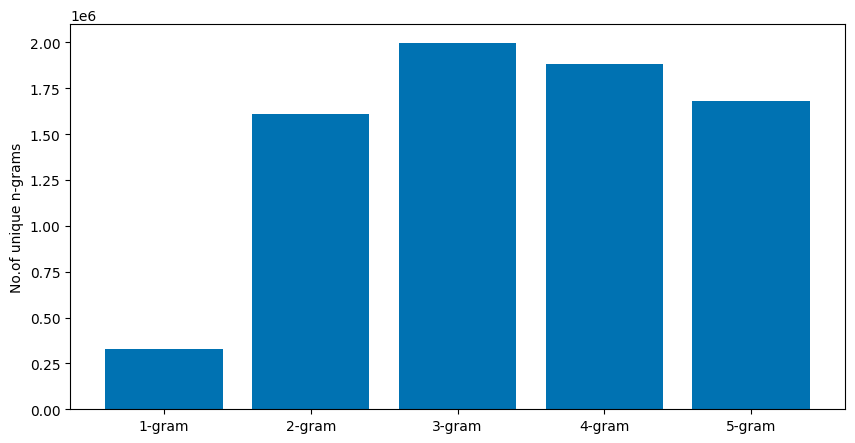

In [53]:
plt.figure(figsize = (10,5))
plt.bar(x = ["1-gram","2-gram","3-gram","4-gram","5-gram"], height = ngrams_count)
plt.ylabel("No.of unique n-grams")

# Language models

**Using n grams and laplace smoothening**

In [54]:
telugu_news_df["topic"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [55]:
from indicnlp.tokenize import sentence_tokenize


# function to build a n-gram vocabulary
def build_n_gram_vocab(n, tot_sentences_proc):

  if n > 1:
    n_grams_telugu_vocab = {}

    for sen in tot_sentences_proc:
      tokens = indic_tokenize.trivial_tokenize(sen)
      ngram = list(ngrams(tokens, n))
      for ngm in ngram:
        if tuple(ngm) not in n_grams_telugu_vocab:
          n_grams_telugu_vocab[tuple(ngm)] = 1

        else:
          n_grams_telugu_vocab[tuple(ngm)] += 1

    n_grams_telugu_vocab = {k: v for k, v in sorted(n_grams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}


  else:
    n_grams_telugu_vocab = {}

    for sen in tot_sentences_proc:
      tokens = indic_tokenize.trivial_tokenize(sen)
      ngram = list(ngrams(tokens, 1)) 

      for ngm in ngram:
        if ngm not in n_grams_telugu_vocab:
          n_grams_telugu_vocab[ngm] = 1

        else:
          n_grams_telugu_vocab[ngm] += 1

    n_grams_telugu_vocab = {k: v for k, v in sorted(n_grams_telugu_vocab.items(), key=lambda item: item[1], reverse = True)}

  return n_grams_telugu_vocab

# function to get the vocabulary of the text of a class specified
def get_class_vocab(class_id, n_grams = 1):
  tot_text_class = ""

  for t in telugu_news_df[telugu_news_df["topic"] == class_id]["body_processed"]:
    tot_text_class += t

  tot_sentances_class = sentence_tokenize.sentence_split(tot_text_class, lang='te')

  vocab = build_n_gram_vocab(n_grams, tot_sentances_class)
    
  return vocab

In [56]:
# function to get the probabity of the input text to be belonging to a specific class
def get_prob_class_ngram(input_text, vocab, n_grams, class_id, laplace_param = 1):
  total_tokens = len(vocab)
  Prob_input = 1

  tokens = indic_tokenize.trivial_tokenize(input_text)

  vocab_n_1 = get_class_vocab(class_id, n_grams-1)
  
  if n_grams > 1:
    ngram = list(ngrams(tokens, n_grams))
    for ngm in ngram:

      prior_ngm = tuple(ngm[:n_grams-1])
      if prior_ngm in vocab_n_1:
        count_denom = vocab_n_1[prior_ngm]
      else:
        count_denom = 1

      if tuple(ngm) in vocab:
        count_w = vocab[tuple(ngm)]
      else:
        count_w = 0
      Prob_input *= ((count_w + laplace_param)/(count_denom+(laplace_param*len(vocab_n_1))))

  else:
    tokens = indic_tokenize.trivial_tokenize(sen)
    ngram = list(ngrams(tokens, 1))

    for ngm in ngram:
      if ngm in vocab:
        count_w = vocab[ngm]
      else:
        count_w = 0

      prob = count_w/total_tokens
      Prob_input *= count_w/total_tokens

  return Prob_input

def get_max_ind(arr):

  n = len(arr)

  max_ind = 0
  max_prob = arr[0]

  for i in range(1,n):

    if arr[i] > max_prob:
      max_ind = i
      max_prob = arr[i]

  return max_ind, max_prob


# Function to classify the given input text using the n_grams model
def classify_text(text, n_grams, laplace_param = 0):

  cls0_vocab = get_class_vocab(0, n_grams)
  cls1_vocab = get_class_vocab(1, n_grams)
  cls2_vocab = get_class_vocab(2, n_grams)
  cls3_vocab = get_class_vocab(3, n_grams)
  cls4_vocab = get_class_vocab(4, n_grams)

  probs_arr = []

  cls0_prob = get_prob_class_ngram(text, cls0_vocab, n_grams,0, laplace_param)
  cls1_prob = get_prob_class_ngram(text, cls1_vocab, n_grams,1, laplace_param)
  cls2_prob = get_prob_class_ngram(text, cls2_vocab, n_grams,2, laplace_param)
  cls3_prob = get_prob_class_ngram(text, cls3_vocab, n_grams,3, laplace_param)
  cls4_prob = get_prob_class_ngram(text, cls4_vocab, n_grams,4, laplace_param)

  probs_arr.append(cls0_prob)
  probs_arr.append(cls1_prob)
  probs_arr.append(cls2_prob)
  probs_arr.append(cls3_prob)
  probs_arr.append(cls4_prob)

#   We select the class with max probability as the final output
  print(probs_arr)
  class_pred, prob_cls = get_max_ind(probs_arr)

  return class_pred, prob_cls

### Using uni-gram model to classify

In [57]:
text = "స్టార్ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటికీ కుటుంబంతో గడిపే అవకాశాన్ని ఏ మాత్రం వదులుకోవడం"
class_pred, prob = classify_text(text, 1)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

# As we can see this model has missclassfied this text

[0.0, 0.0, 1.5854392079695025e-25, 0.0, 0.0]
Predticted class -> nation 
Predicted with probabilty =  1.5854392079695025e-23


### Using bi-gram model to classify

In [58]:
text = "స్టార్ హీరోగా వరుస సినిమాలతో బిజీగా ఉన్నప్పటికీ కుటుంబంతో గడిపే అవకాశాన్ని ఏ మాత్రం వదులుకోవడం"
class_pred, prob = classify_text(text, 2, laplace_param = 2)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

# The same text is now classified better with the bi-gram model

[7.539467241817366e-52, 7.31668157691397e-51, 1.1717407701942233e-55, 6.301709540971078e-50, 9.973784159019319e-55]
Predticted class -> entertainment 
Predicted with probabilty =  6.301709540971078e-48


In [59]:
# Using another text piece for the classification
text = "బాహుబలి2 సినిమా సంచలనం మెజారిటీ జనాలు మాత్రం బాహుబలి2ను ఆదరిస్తున్నారు సినీ ప్రముఖులు కూడా బాహుబలి2ను"
class_pred, prob = classify_text(text, 2, laplace_param = 2)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[2.0110665825536858e-53, 3.024676982957221e-52, 7.831626215013029e-56, 3.126894856378308e-51, 1.6914625670477634e-55]
Predticted class -> entertainment 
Predicted with probabilty =  3.1268948563783083e-49


### Using tri-grams to classify

In [60]:
text = "బాహుబలి2 సినిమా సంచలనం మెజారిటీ జనాలు మాత్రం బాహుబలి2ను ఆదరిస్తున్నారు సినీ ప్రముఖులు కూడా బాహుబలి2ను దర్శకుడు రాజమౌళిని ప్రశంసలతో ముంచెత్తుతున్నారు"
class_pred, prob = classify_text(text, 3, laplace_param = 3)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

# As we can see, as the input text's length increases out language model's confidence in the prediction also decreses
# Here, also the text is misclassified

[8.100269552898122e-77, 9.034344690378677e-75, 2.8067273076842573e-81, 8.737449308546919e-79, 4.301426135460897e-79]
Predticted class -> sports 
Predicted with probabilty =  9.034344690378676e-73


### Using 4-gram model 

In [61]:
text = "బాహుబలి2 సినిమా సంచలనం మెజారిటీ జనాలు మాత్రం బాహుబలి2ను ఆదరిస్తున్నారు సినీ ప్రముఖులు కూడా బాహుబలి2ను దర్శకుడు రాజమౌళిని ప్రశంసలతో ముంచెత్తుతున్నారు"
class_pred, prob = classify_text(text, 4, laplace_param = 5)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[5.454295653100135e-73, 8.120930489231527e-71, 4.8162484724192635e-77, 1.3511229185333792e-75, 2.7514511154241185e-74]
Predticted class -> sports 
Predicted with probabilty =  8.120930489231528e-69


### Using the 5-gram model

In [62]:
text = "బాహుబలి2 సినిమా సంచలనం మెజారిటీ జనాలు మాత్రం బాహుబలి2ను ఆదరిస్తున్నారు సినీ ప్రముఖులు కూడా బాహుబలి2ను దర్శకుడు రాజమౌళిని ప్రశంసలతో ముంచెత్తుతున్నారు"
class_pred, prob = classify_text(text, 5, laplace_param = 5)
print("Predticted class ->",inv_topic_dict[class_pred], "\nPredicted with probabilty = " ,prob*100)

[9.383043939066722e-68, 1.1700941656830867e-65, 2.1836803718626474e-71, 4.175812490954377e-70, 1.0438681175394662e-68]
Predticted class -> sports 
Predicted with probabilty =  1.1700941656830867e-63


# **Classification of telugu text based on topic**

### Preprocessing the test dataset (removing punctuations, tokenising, etc)

In [63]:
test_path = "telugu_dataset/telugu_news/test_telugu_news.csv"

test_news_df = pd.read_csv(test_path)

del test_news_df["heading"]
del test_news_df["SNo"]
del test_news_df["date"]

test_news_df.head()

,body,topic
0,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,entertainment
1,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment
2,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation
3,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation
4,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,entertainment


In [64]:
y_test = test_news_df["topic"].apply(func_topic)
del test_news_df["topic"]

In [65]:
test_news_df["body_processed"] = test_news_df["body"].str.replace('\u200c', '')
test_news_df["body_processed"] = test_news_df["body_processed"].str.replace('\n', '')
test_news_df["body_processed"] = test_news_df["body_processed"].str.replace('\t', '')
test_news_df["body_processed"] = test_news_df["body_processed"].str.replace('\xa0', '')

test_news_df["body_processed"] = test_news_df["body_processed"].apply(lambda text: remove_punctuation(text))

del test_news_df["body"]

In [66]:
test_news_df.head()

,body_processed
0,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...
1,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...
2,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...
3,నేటి మధ్యాహ్నం 159కి కౌంట్డౌన్ షురూశ్రీహరికోట ...
4,‘ఏమి రా అబ్బి యాడికి పోయినావు’ అంటూ రాయలసీమ యా...


In [67]:
categories = [i for i in range(5)]

test_text = []
for t in test_news_df["body_processed"]:
  test_text.append(t)

In [68]:
x_test = test_text

print(len(x_test) , len(y_test))

4329 4329


## Using Count Vectorizer to get the data into sk-learn's format


In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [70]:
train_path = "telugu_dataset/telugu_news/train_telugu_news.csv"

train_news_df = pd.read_csv(train_path)

del train_news_df["heading"]
del train_news_df["SNo"]
del train_news_df["date"]

train_news_df.head()
y_train = train_news_df["topic"].apply(func_topic)
del train_news_df["topic"]

train_news_df["body_processed"] = train_news_df["body"].str.replace('\u200c', '')
train_news_df["body_processed"] = train_news_df["body_processed"].str.replace('\n', '')
train_news_df["body_processed"] = train_news_df["body_processed"].str.replace('\t', '')
train_news_df["body_processed"] = train_news_df["body_processed"].str.replace('\xa0', '')

train_news_df["body_processed"] = train_news_df["body_processed"].apply(lambda text: remove_punctuation(text))

del train_news_df["body"]

train_news_df.head()

categories = [i for i in range(5)]

train_text = []
for t in train_news_df["body_processed"]:
  train_text.append(t)


x_train = train_text

print(len(x_train) , len(y_train))

17312 17312


In [71]:
print(len(train_text))

17312


In [72]:
import regex 
from indicnlp.tokenize import indic_tokenize


def custom_analyzer(text):
    words = regex.findall(r'\w{1,}', text) 
    for w in words:
        yield w

In [73]:


count_vec = CountVectorizer(max_df = 0.75, lowercase = False , analyzer = custom_analyzer, max_features=100000, ngram_range=(1,5))

x_train_features = count_vec.fit_transform(x_train)

c:\Users\sathishreddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [74]:

len(count_vec.stop_words_)

201776

In [75]:

x_test_features = count_vec.transform(x_test)


In [83]:
#from sklearn.random_projection import SparseRandomProjection
#from sklearn.decomposition import TruncatedSVD
#from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import classification_report

# Apply Sparse Random Projection for dimensionality reduction
#rks = SparseRandomProjection(n_components=8000)
#X_train_reduced_rks = rks.fit_transform(x_train_features)
#X_test_reduced_rks = rks.transform(x_test_features)

# Apply TruncatedSVD for dimensionality reduction
#svd = TruncatedSVD(n_components=500)
#X_train_reduced_svd = svd.fit_transform(X_train_reduced_rks)
#X_test_reduced_svd = svd.transform(X_test_reduced_rks)

# Normalize the data
#scaler = MinMaxScaler()
#X_train_reduced = scaler.fit_transform(X_train_reduced_svd)
#X_test_reduced = scaler.transform(X_test_reduced_svd)

# Train a classifier on the reduced dataset
#classifier = MultinomialNB()
#classifier.fit(X_train_reduced, y_train)

# Evaluate the classifier
#y_pred = classifier.predict(X_test_reduced)
#print(classification_report(y_test, y_pred))


In [76]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report
import numpy as np

# Apply RKS for dimensionality reduction
rks = SparseRandomProjection(n_components=8000)
X_train_reduced = rks.fit_transform(x_train_features)
X_test_reduced = rks.transform(x_test_features)

# Convert the sparse matrix to a dense numpy array
X_train_reduced = X_train_reduced.toarray()
X_test_reduced = X_test_reduced.toarray()

# Make the data non-negative
X_train_reduced = np.abs(X_train_reduced)
X_test_reduced = np.abs(X_test_reduced)

# Normalize the data
scaler = MaxAbsScaler()
X_train_reduced = scaler.fit_transform(X_train_reduced)
X_test_reduced = scaler.transform(X_test_reduced)

# Train a classifier on the reduced dataset
classifier = MultinomialNB()
classifier.fit(X_train_reduced, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test_reduced)
print(classification_report(y_test, y_pred))



# Print the dimensionality of RKS
print("Dimensionality of RKS:", rks.n_components)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       653
           1       0.98      0.77      0.86       437
           2       0.81      0.94      0.87      1673
           3       0.96      0.93      0.95      1289
           4       0.84      0.59      0.69       277

    accuracy                           0.88      4329
   macro avg       0.90      0.81      0.84      4329
weighted avg       0.89      0.88      0.88      4329

Dimensionality of RKS: 8000


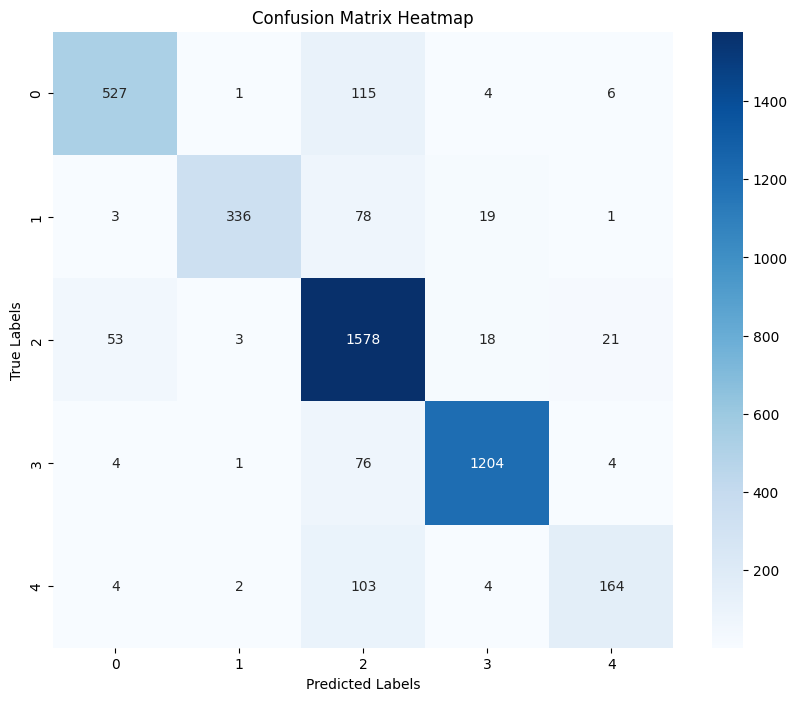

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [78]:
print(X_test_reduced.shape)

(4329, 8000)


In [78]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Apply RKS for dimensionality reduction
rks = SparseRandomProjection(n_components=8000)
X_reduced = rks.fit_transform(x_train_features)

# Convert the sparse matrix to a dense numpy array
X_reduced = X_reduced.toarray()

# Make the data non-negative
X_reduced = np.abs(X_reduced)

# Normalize the data
scaler = MaxAbsScaler()
X_reduced = scaler.fit_transform(X_reduced)

# Train a classifier on the reduced dataset
classifier = MultinomialNB()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_reduced, y_train, cv=5)

# Fit the classifier on the entire training set
classifier.fit(X_reduced, y_train)

# Evaluate the classifier on the test set
X_test_reduced = rks.transform(x_test_features)
X_test_reduced = X_test_reduced.toarray()
X_test_reduced = np.abs(X_test_reduced)
X_test_reduced = scaler.transform(X_test_reduced)
y_pred = classifier.predict(X_test_reduced)

# Print cross-validation scores and classification report
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_pred))


Cross-validation scores: [0.88391568 0.87814034 0.89052571 0.88012709 0.87926054]
Mean cross-validation score: 0.882393873135714
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       653
           1       0.98      0.76      0.85       437
           2       0.81      0.94      0.87      1673
           3       0.96      0.93      0.95      1289
           4       0.87      0.62      0.73       277

    accuracy                           0.88      4329
   macro avg       0.90      0.82      0.85      4329
weighted avg       0.89      0.88      0.88      4329



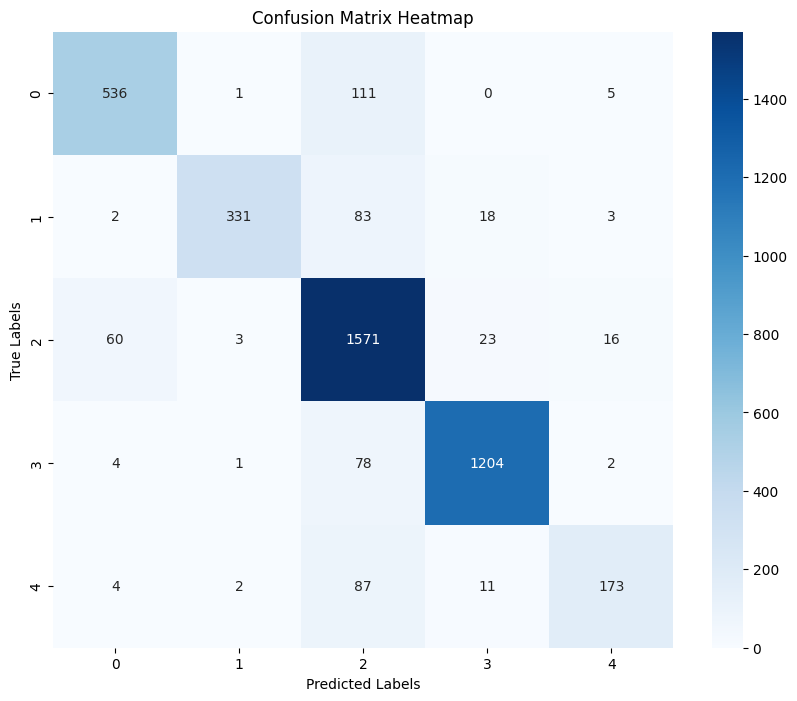

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [80]:
from sklearn.svm import SVC
svm_classifier = SVC()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_reduced, y_train, cv=5)###########################################################################

# Fit the classifier on the entire training set
classifier.fit(X_reduced, y_train)

# Evaluate the classifier on the test set
X_test_reduced = rks.transform(x_test_features)
X_test_reduced = X_test_reduced.toarray()
X_test_reduced = np.abs(X_test_reduced)
X_test_reduced = scaler.transform(X_test_reduced)
y_pred = classifier.predict(X_test_reduced)

# Print cross-validation scores and classification report
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.88391568 0.87814034 0.89052571 0.88012709 0.87926054]
Mean cross-validation score: 0.882393873135714
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       653
           1       0.98      0.76      0.85       437
           2       0.81      0.94      0.87      1673
           3       0.96      0.93      0.95      1289
           4       0.87      0.62      0.73       277

    accuracy                           0.88      4329
   macro avg       0.90      0.82      0.85      4329
weighted avg       0.89      0.88      0.88      4329



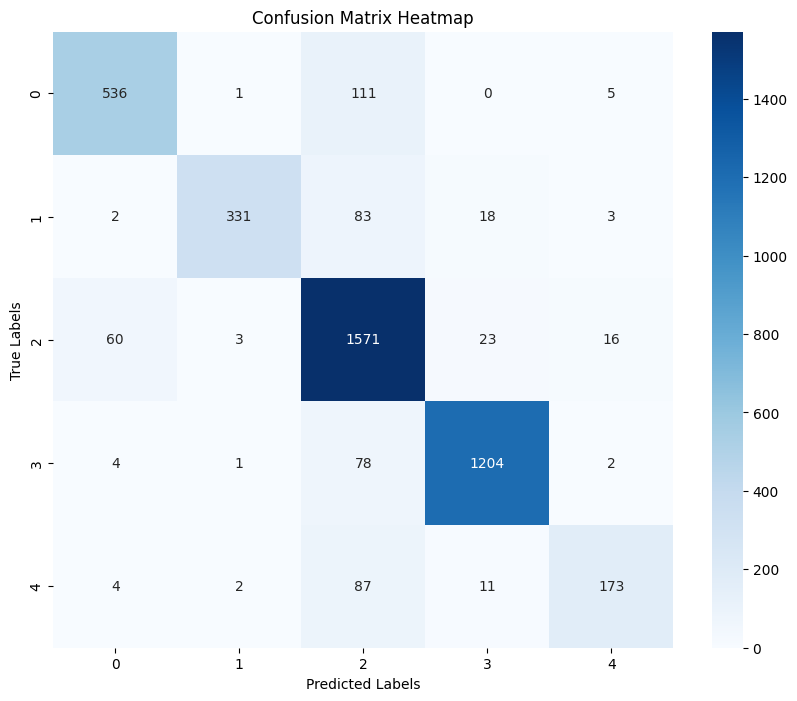

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize the classifier
classifier = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_reduced, y_train, cv=5)################################################################

# Fit the classifier on the entire training set
classifier.fit(X_reduced, y_train)

# Evaluate the classifier on the test set
X_test_reduced = rks.transform(x_test_features)
X_test_reduced = X_test_reduced.toarray()
X_test_reduced = np.abs(X_test_reduced)
X_test_reduced = scaler.transform(X_test_reduced)
y_pred = classifier.predict(X_test_reduced)

# Print cross-validation scores and classification report
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_pred))


Cross-validation scores: [0.49610165 0.51775917 0.50866551 0.49306759 0.48209128]
Mean cross-validation score: 0.49953703865890675
              precision    recall  f1-score   support

           0       0.74      0.54      0.62       653
           1       0.80      0.48      0.60       437
           2       0.76      0.53      0.62      1673
           3       0.84      0.49      0.62      1289
           4       0.11      0.66      0.19       277

    accuracy                           0.52      4329
   macro avg       0.65      0.54      0.53      4329
weighted avg       0.74      0.52      0.59      4329



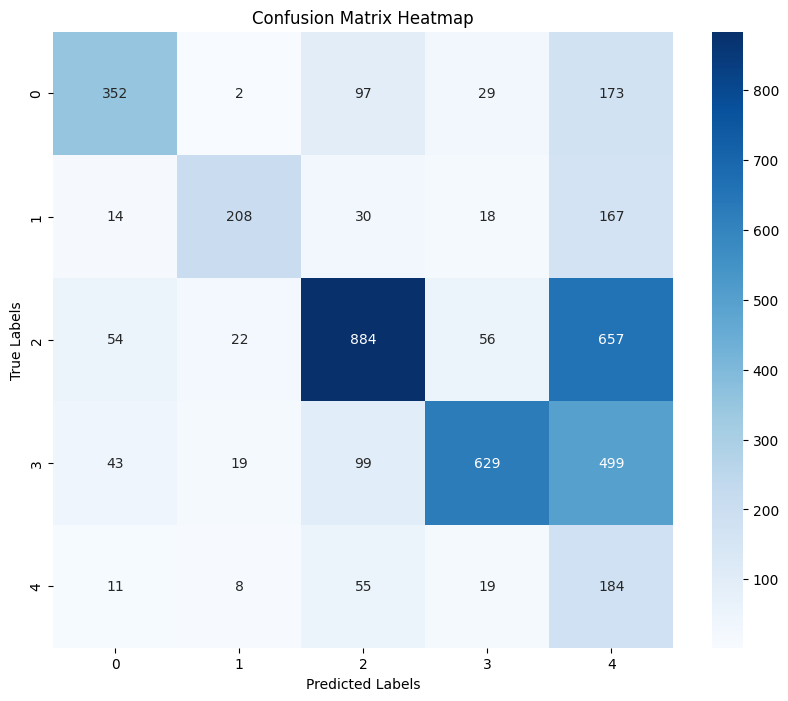

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Initialize the classifier
classifier = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_reduced, y_train, cv=5)

# Scale the data
scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Fit the classifier on the entire training set
classifier.fit(X_reduced_scaled, y_train)

# Evaluate the classifier on the test set
y_pred = classifier.predict(X_test_reduced_scaled) 

# Print cross-validation scores and classification report
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize the classifier
classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_reduced, y_train, cv=5)################################################

# Fit the classifier on the entire training set
classifier.fit(X_reduced, y_train)

# Evaluate the classifier on the test set
X_test_reduced = rks.transform(x_test_features)
X_test_reduced = X_test_reduced.toarray()
X_test_reduced = np.abs(X_test_reduced)
X_test_reduced = scaler.transform(X_test_reduced)
y_pred = classifier.predict(X_test_reduced)

# Print cross-validation scores and classification report
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_pred))


Cross-validation scores: [0.75859082 0.74761767 0.77209705 0.75332178 0.75505488]
Mean cross-validation score: 0.7573364408729203
              precision    recall  f1-score   support

           0       0.48      0.66      0.56       653
           1       0.98      0.31      0.47       437
           2       0.63      0.64      0.64      1673
           3       0.87      0.70      0.78      1289
           4       0.30      0.61      0.41       277

    accuracy                           0.63      4329
   macro avg       0.65      0.59      0.57      4329
weighted avg       0.70      0.63      0.64      4329



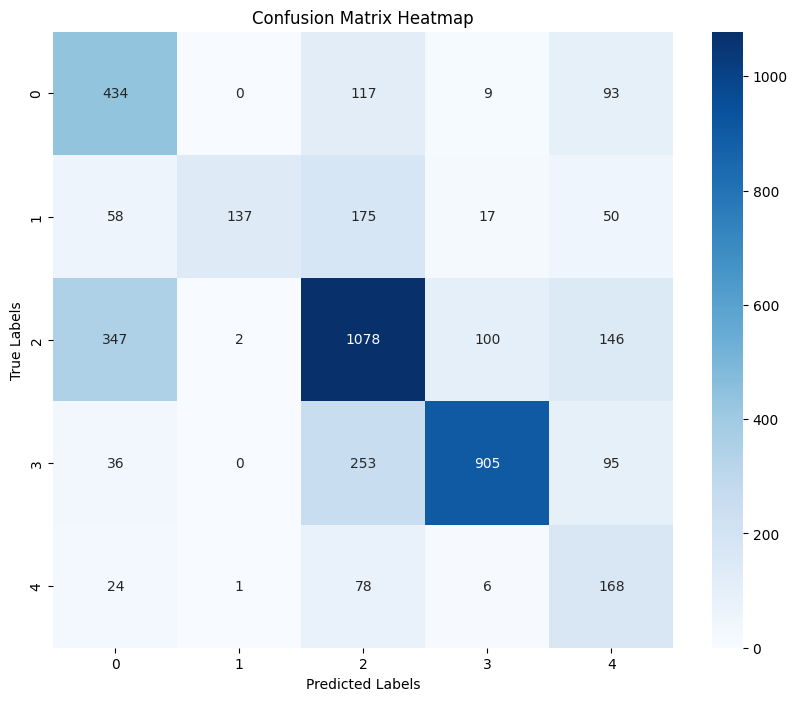

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [84]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Convert labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

# Split the data into training and validation sets
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_reduced, y_encoded, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train.shape[2])))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=10, batch_size=32)

# Prepare test data for prediction
X_test_reduced = np.reshape(X_test_reduced, (X_test_reduced.shape[0], 1, X_train.shape[2]))

# Make predictions on the test data
y_pred_probabilities = model.predict(X_test_reduced)
y_pred_encoded = np.argmax(y_pred_probabilities, axis=1)

# Convert predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Convert test labels to original labels
y_test_original = label_encoder.inverse_transform(y_test)

# Print classification report
print(classification_report(y_test_original, y_pred))


Epoch 1/10
433/433 [==============================] - 43s 85ms/step - loss: 0.4700 - accuracy: 0.8535 - val_loss: 0.2514 - val_accuracy: 0.9220
Epoch 2/10
433/433 [==============================] - 37s 84ms/step - loss: 0.1367 - accuracy: 0.9612 - val_loss: 0.2253 - val_accuracy: 0.9336
Epoch 3/10
433/433 [==============================] - 37s 85ms/step - loss: 0.0623 - accuracy: 0.9829 - val_loss: 0.2168 - val_accuracy: 0.9368
Epoch 4/10
433/433 [==============================] - 38s 87ms/step - loss: 0.0329 - accuracy: 0.9921 - val_loss: 0.2334 - val_accuracy: 0.9327
Epoch 5/10
433/433 [==============================] - 37s 86ms/step - loss: 0.0212 - accuracy: 0.9952 - val_loss: 0.2473 - val_accuracy: 0.9362
Epoch 6/10
433/433 [==============================] - 38s 87ms/step - loss: 0.0152 - accuracy: 0.9973 - val_loss: 0.2747 - val_accuracy: 0.9327
Epoch 7/10
433/433 [==============================] - 37s 85ms/step - loss: 0.0121 - accuracy: 0.9981 - val_loss: 0.2873 - val_accuracy:

In [87]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Apply RKS for dimensionality reduction
rks = SparseRandomProjection(n_components=8000)
X_reduced = rks.fit_transform(x_train_features)

# Convert the sparse matrix to a dense numpy array
X_reduced = X_reduced.toarray()

# Make the data non-negative
X_reduced = np.abs(X_reduced)

# Normalize the data
scaler = MaxAbsScaler()
X_reduced = scaler.fit_transform(X_reduced)

# Train a classifier on the reduced dataset
classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_reduced, y_train, cv=5)

# Fit the classifier on the entire training set
classifier.fit(X_reduced, y_train)

# Evaluate the classifier on the test set
X_test_reduced = rks.transform(x_test_features)
X_test_reduced = X_test_reduced.toarray()
X_test_reduced = np.abs(X_test_reduced)
X_test_reduced = scaler.transform(X_test_reduced)
y_pred = classifier.predict(X_test_reduced)

# Print cross-validation scores and classification report
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_pred))

c:\Users\sathishreddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\sathishreddy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Cross-validation scores: [0.93387237 0.91943402 0.93731947 0.93327556 0.93327556]
Mean cross-validation score: 0.9314353953563403
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       653
           1       0.96      0.93      0.94       437
           2       0.93      0.95      0.94      1673
           3       0.96      0.97      0.97      1289
           4       0.89      0.84      0.87       277

    accuracy                           0.94      4329
   macro avg       0.94      0.92      0.93      4329
weighted avg       0.94      0.94      0.94      4329



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [86]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Apply RKS for dimensionality reduction
rks = SparseRandomProjection(n_components=8000)
X_reduced = rks.fit_transform(x_train_features)

# Convert the sparse matrix to a dense numpy array
X_reduced = X_reduced.toarray()

# Make the data non-negative
X_reduced = np.abs(X_reduced)

# Normalize the data
scaler = MaxAbsScaler()
X_reduced = scaler.fit_transform(X_reduced)

# Train a classifier on the reduced dataset
classifier = MultinomialNB()

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_reduced, y_train, cv=10)

# Fit the classifier on the entire training set
classifier.fit(X_reduced, y_train)

# Evaluate the classifier on the test set
X_test_reduced = rks.transform(x_test_features)
X_test_reduced = X_test_reduced.toarray()
X_test_reduced = np.abs(X_test_reduced)
X_test_reduced = scaler.transform(X_test_reduced)
y_pred = classifier.predict(X_test_reduced)

# Print cross-validation scores and classification report
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_pred))


Cross-validation scores: [0.88452656 0.88683603 0.88214905 0.88561525 0.89601386 0.88272675
 0.87694974 0.88503755 0.88388215 0.87810514]
Mean cross-validation score: 0.8841842078228419
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       653
           1       0.98      0.77      0.86       437
           2       0.81      0.94      0.87      1673
           3       0.96      0.94      0.95      1289
           4       0.85      0.59      0.70       277

    accuracy                           0.88      4329
   macro avg       0.90      0.81      0.85      4329
weighted avg       0.89      0.88      0.88      4329



In [87]:
print(x_train_features.shape)
print(x_test_features.shape)

(17312, 100000)
(4329, 100000)


In [130]:
rks = SparseRandomProjection(n_components=8000)
X_test_reduced = rks.fit_transform(x_test_features)


In [106]:
X_reduced.shape

(17312, 8000)

In [108]:
print(y_test.shape)
print(y_train.shape)


(4329,)
(17312,)


In [178]:
import numpy as np

# Define Q-learning algorithm

# Initialize Q-table
X_reduced = X_reduced[:1000]
y_train = y_train[:1000]
num_states = X_reduced.shape[0]
num_actions = len(np.unique(y_train))
Q = np.zeros((num_states, num_actions))


In [181]:
print(num_states)

1000


In [182]:
print(num_states)


1000


In [183]:
print(Q.shape)

(1000, 5)


In [199]:

# Set hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1



In [221]:
def calculate_reward(state, action):
    predicted_label = action 
    true_label = y_train[state]  # Get the true label corresponding to the state

    # Compare the predicted label and true label
    if predicted_label == true_label:
        reward = 1  # Assign a positive reward for correct prediction
    else:
        reward = -1  # Assign a negative reward for incorrect prediction

    return reward


In [186]:
print("Q-table shape:", Q.shape)


Q-table shape: (1000, 5)


In [187]:
print(len(X_reduced))


1000


In [194]:
print("state:", state)
print("next_state:", next_state)


state: 999
next_state: 999


In [207]:
def is_episode_finished(state):
    """
    Check if the episode is finished based on the current state and maximum number of steps.

    Args:
        state (int): Current state of the agent.
        max_steps (int): Maximum number of steps allowed in an episode.

    Returns:
        bool: True if the episode is finished, False otherwise.
    """
    if state >= num_states:
        return True
    else:
        return False




In [222]:
state = 0  # Initial state
done = False  # Episode termination flag

while not done:
    # Exploration-Exploitation Trade-off
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(num_actions)  # Explore
    else:
        action = np.argmax(Q[state])  # Exploit

    # Update to the next state
    next_state = min(state + 1, len(X_reduced) - 1)

    # Calculate the reward based on your specific problem
    reward = calculate_reward(state, action)

    Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

    state = next_state  # Move to the next state

# Print the learned Q-table
print("Learned Q-table:")
print(Q)


KeyboardInterrupt: 

In [208]:
# Train Q-learning agent
for episode in range(num_episodes):  # Number of training episodes
    state = 0  # Initial state
    done = False  # Episode termination flag

    while not done:
        # Exploration-Exploitation Trade-off
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(num_actions)  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit

        # Update to the next state
        next_state = min(state + 1, len(X_reduced) - 1)

        # Calculate the reward based on your specific problem
        reward = calculate_reward(state, action)

        # Update Q-table using Q-learning equation
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state  # Move to the next state

        # Check if episode is finished
        done = is_episode_finished(state)

    # Decay exploration rate epsilon over time
    epsilon *= epsilon_decay

    # Display progress
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{num_episodes}")

# Print the learned Q-table
    print("Learned Q-table:")
    print(Q)


KeyboardInterrupt: 

In [ ]:


# Use Q-learning agent for prediction
y_pred_rl = []
for state in X_test_reduced:
    action = np.argmax(Q[state])
    y_pred_rl.append(action)

# Convert predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_rl)

# Convert test labels to original labels
y_test_original = label_encoder.inverse_transform(y_test)

# Print classification report
print(classification_report(y_test_original, y_pred))


In [ ]:

# Use Q-learning agent for prediction
y_pred_rl = []
for state in X_test_reduced:
    action = np.argmax(Q[state])
    y_pred_rl.append(action)

# Print classification report
print(classification_report(y_test, y_pred_rl))


## Using **Multinomial Naive Baye's** classifier from sk-learn to classify the given telugu texts in the test dataset

In [88]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train_features, y_train)
MultinomialNB()

MultinomialNB()

In [89]:
print("Test score :- ", clf.score(x_test_features, y_test))

Test score :-  0.93993993993994


In [90]:
from sklearn.metrics import classification_report

y_pred_test = clf.predict(x_test_features)
target_names = list(inv_topic_dict.values())

In [91]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

               precision    recall  f1-score   support

     business       0.88      0.96      0.92       653
       sports       0.98      0.93      0.95       437
       nation       0.95      0.92      0.93      1673
entertainment       0.97      0.97      0.97      1289
    editorial       0.87      0.86      0.87       277

     accuracy                           0.94      4329
    macro avg       0.93      0.93      0.93      4329
 weighted avg       0.94      0.94      0.94      4329



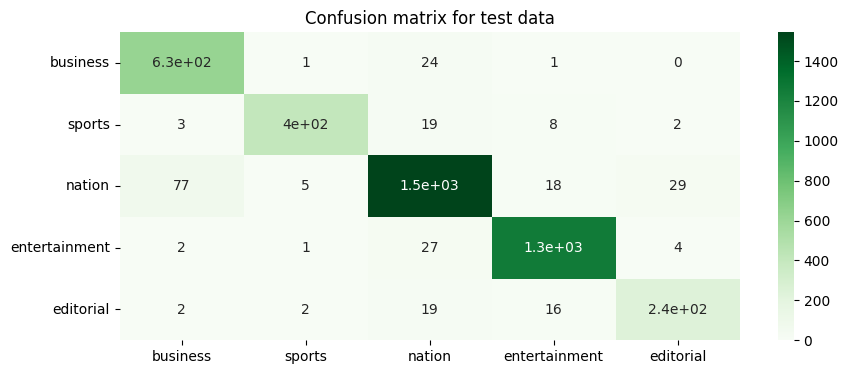

Accuracy score =  0.93993993993994


In [92]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score
confusion_mat = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10,4))
plt.title("Confusion matrix for test data")
plt.xlabel("Predicted class")
plt.ylabel("True class")

sns.heatmap(confusion_mat, annot=True, cmap="Greens",  xticklabels = target_names,
           yticklabels=target_names)
plt.show()
print("Accuracy score = ",accuracy_score(y_test, y_pred_test))

In [93]:
# Function for predicting a sample text with the trained model

def predict_text_sample(test_text, inv_topic_dict, clf, count_vec):
  test_sample = [test_text]
  x_test_sample_fetaures = count_vec.transform(test_sample)
  y_pred_test_sample = clf.predict(x_test_sample_fetaures)

  return inv_topic_dict[y_pred_test_sample[0]]

In [94]:
# This text is about some movie news from a telugu blogsite
test_text ="ఇండియన్ స్క్రీన్ మీద పోటీ పడటం అయిపోయింది అందుకే ఇప్పుడు మన సినిమాలు ఫారిన్ రిలీజ్ లో పోటీ పడుతున్నాయి. ఇండియన్ సినిమాలు ముఖ్యంగా సౌత్ సినిమాలు రిలీజ్ అవుతున్నాయి అంటే వరల్డ్ వైడ్ మార్కెట్ ఓపెన్ అవుతుంది. తెలుగు తమిళ హిందీ భాషల సినిమాలు సబ్ టైటిల్స్ తో విధేశాల్లో కూడా రిలీజ్ అవుతున్నాయి"

print("Prediced class is " , predict_text_sample(test_text, inv_topic_dict, clf, count_vec))

Prediced class is  entertainment


In [95]:
# This sample text is about some political news from a telugu news website (Eenadu)

test_text = "హైదరాబాద్: తెలంగాణలో సంచలనం సృష్టించిన ‘ఎమ్మెల్యేలకు ఎర’ కేసులో హైకోర్టు కీలక తీర్పు వెల్లడించింది. ఈ కేసులో ముగ్గురు నిందితుల రిమాండ్‌కు ఉన్నత న్యాయస్థానం అనుమతించింది. నిందితులు వెంటనే సైబరాబాద్ కమిషనర్‌ స్టీఫెన్‌ రవీంద్ర ఎదుట లొంగిపోవాలని ఆదేశించింది. ఒకవేళ లొంగిపోకపోతే వారిని అరెస్టు చేసి ఏసీబీ కోర్టులో హాజరుపర్చాలని.. ఆ తర్వాత రిమాండ్‌కు తరలించాలని పోలీసులను ధర్మాసనం ఆదేశించింది."
print("Prediced class is " , predict_text_sample(test_text, inv_topic_dict, clf, count_vec))

Prediced class is  nation


In [96]:
# This sample text is about some sports news from a telugu news website (Eenadu)

test_text = "టీ20 ప్రప్రంచకప్‌లో టీమ్‌ఇండియా ఆడటానికి ముందు న్యూజిలాండ్‌తో వార్మప్‌ మ్యాచ్‌ జరగాల్సి ఉంది. అయితే వర్షం కారణంగా రద్దైంది. ఆ తర్వాత పాకిస్థాన్‌తో మెల్‌బోర్న్‌ వేదికగా మ్యాచ్‌కు వరుణుడి గండం ఉందని వార్తలు వచ్చాయి. దీంతో సోషల్‌ మీడియాలో మీమ్స్‌ కూడా భారీ స్థాయిలో ట్రోల్‌ అయ్యాయి. అయితే వాతావరణం అనుకూలంగా మారడంతో దాయాదుల పోరును అక్టోబర్‌ 23న వీక్షించే అవకాశం అభిమానులకు దక్కింది. ఉత్కంఠపోరులో టీమ్‌ఇండియా విజయం సాధించిన విషయం తెలిసిందే. "
print("Prediced class is " , predict_text_sample(test_text, inv_topic_dict, clf, count_vec))

Prediced class is  sports
